# Lindsey's Initial Data Exploration and Models

In [12]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, plot_confusion_matrix

Additional library for additional encoders: https://contrib.scikit-learn.org/category_encoders/

In [13]:
import category_encoders as ce

In [ ]:
# Command to install category_encoders if you'd like to use it:
# !conda install -c conda-forge category_encoders

## Business Understanding

End Users:


Business Problem Summary:


Context:

- False negative in this context: 
    - Outcome: 
- False positive in this context: 
    - Outcome: 
    
Evaluation:

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [9]:
!ls ../..

README.md data      notebooks


In [5]:
!ls ../../data

cat_in_the_dat2_train.csv


In [3]:
df = pd.read_csv("../../data/cat_in_the_dat2_train.csv", index_col='id')

In [4]:
df.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600000 entries, 0 to 599999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   bin_0   582106 non-null  float64
 1   bin_1   581997 non-null  float64
 2   bin_2   582070 non-null  float64
 3   bin_3   581986 non-null  object 
 4   bin_4   581953 non-null  object 
 5   nom_0   581748 non-null  object 
 6   nom_1   581844 non-null  object 
 7   nom_2   581965 non-null  object 
 8   nom_3   581879 non-null  object 
 9   nom_4   581965 non-null  object 
 10  nom_5   582222 non-null  object 
 11  nom_6   581869 non-null  object 
 12  nom_7   581997 non-null  object 
 13  nom_8   582245 non-null  object 
 14  nom_9   581927 non-null  object 
 15  ord_0   581712 non-null  float64
 16  ord_1   581959 non-null  object 
 17  ord_2   581925 non-null  object 
 18  ord_3   582084 non-null  object 
 19  ord_4   582070 non-null  object 
 20  ord_5   582287 non-null  object 
 21  day     58

In [6]:
# Exploring numeric cols
df.describe()

,bin_0,bin_1,bin_2,ord_0,day,month,target
count,582106.000000,581997.000000,582070.000000,581712.000000,582048.000000,582012.000000,600000.000000
mean,0.092301,0.185532,0.278704,1.948224,4.112767,6.371317,0.187205
std,0.289451,0.388729,0.448362,0.853904,2.034430,3.458959,0.390076
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,0.000000
50%,0.000000,0.000000,0.000000,2.000000,5.000000,6.000000,0.000000
75%,0.000000,0.000000,1.000000,3.000000,6.000000,8.000000,0.000000
max,1.000000,1.000000,1.000000,3.000000,7.000000,12.000000,1.000000


In [7]:
# Exploring object cols
df[[c for c in df.columns if df[c].dtype == 'object']].describe()

,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_1,ord_2,ord_3,ord_4,ord_5
count,581986,581953,581748,581844,581965,581879,581965,582222,581869,581997,582245,581927,581959,581925,582084,582070,582287
unique,2,2,3,6,6,6,4,1220,1519,222,222,2218,5,6,15,26,190
top,F,N,Red,Triangle,Hamster,India,Theremin,fc8fc7e56,ea8c5e181,4ae48e857,7d7c02c57,8f3276a6e,Novice,Freezing,n,N,Fl
freq,366212,312344,323286,164190,164897,164869,308621,977,805,5035,5052,565,160597,142726,70982,39978,10562


In [8]:
# Exploring target distribution
df['target'].value_counts(normalize=True)

0    0.812795
1    0.187205
Name: target, dtype: float64

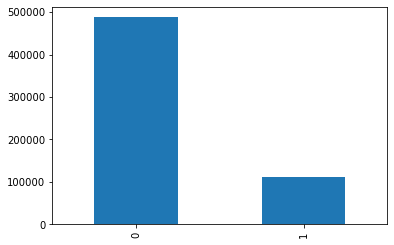

In [10]:
df['target'].value_counts().plot(kind='bar');

In [11]:
# Define our X and y

X = df.drop(columns=['target'])
y = df['target']

# and train test split - to create our val holdout set!
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, # saving 10%
                                                  random_state=0)

### Pipeline Set Up:

Reference: https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

First model: Decision Tree

Define a Pipeline strategy:

- Impute - on all columns (all inputs have null values)
    - Numerics: fill with median
    - Categoricals: fill with "Unknown"
- Different strategies for numeric and categorical:
    - Numerics: nothing! don't need to scale
    - Categorical: encode!
        - How many uniques per column?
            - < 10 --> OHE
            - \> 10 --> Frequency encode


In [16]:
len(X['nom_5'].unique())

1221

In [18]:
X['nom_5'].nunique()

1220

In [20]:
# Set up lists for columns requiring different treatment
num_cols = []
ohe_cols = []
freq_cols = []

for c in X.columns:
    if X[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif X[c].nunique() < 10:
        ohe_cols.append(c)
    else:
        freq_cols.append(c)

In [24]:
print(num_cols)
print(ohe_cols)
print(freq_cols)

['bin_0', 'bin_1', 'bin_2', 'ord_0', 'day', 'month']
['bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'ord_1', 'ord_2']
['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_3', 'ord_4', 'ord_5']


In [37]:
num_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median'))
    ])

ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('oh_encoder', OneHotEncoder(handle_unknown='ignore'))
])

freq_transformer = Pipeline(steps=[
    ('freq_encoder', ce.count.CountEncoder(normalize=True, min_group_size=.05)),
    ('freq_imputer', SimpleImputer(strategy='constant', fill_value=0))
])

In [38]:
# Package those pieces together using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols)
    ])

In [39]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['bin_0', 'bin_1', 'bin_2', 'ord_0', 'day',
                                  'month']),
                                ('ohe',
                                 Pipeline(steps=[('ohe_imputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('oh_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2',
                                  'nom_3', 'nom_4', 'ord_1', 'ord_2']),
                                ('freq',
                                 Pipeline(steps=[('freq_enc

In [40]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

In [42]:
cross_validate(clf, X_train, y_train, return_train_score=True)

{'fit_time': array([14.87976599, 14.19139981, 15.34817004, 14.53497696, 15.04161811]),
 'score_time': array([0.57668209, 0.5677042 , 0.5977757 , 0.58407307, 0.71595693]),
 'test_score': array([0.70992593, 0.7105    , 0.71022222, 0.70848148, 0.71153704]),
 'train_score': array([1., 1., 1., 1., 1.])}

### Grid Search CV

In [51]:
param_grid = {
    "classifier__max_depth": [1, 5, 10],
    "classifier__min_samples_split": [2, 10, 100]
}

In [52]:
grid = GridSearchCV(clf, param_grid, scoring='f1')

In [53]:
output = grid.fit(X_train, y_train)

In [56]:
output.best_params_

{'classifier__max_depth': 10, 'classifier__min_samples_split': 10}

In [59]:
output.best_estimator_.fit(X_train, y_train)

val_preds = output.best_estimator_.predict(X_val)

In [61]:
val_preds

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
y_val

id
262570    0
207212    0
99242     0
243446    0
132564    0
         ..
570972    0
69479     0
270906    0
351235    1
165213    0
Name: target, Length: 60000, dtype: int64

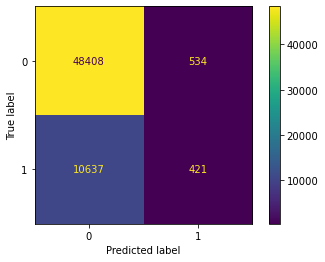

In [64]:
plot_confusion_matrix(output.best_estimator_, X_val, y_val)

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?
- Can you pipeline your preparation steps to use them consistently in the modeling process?

In [1]:
# code here to prepare your data